## Intro

[Good news everyone!](https://www.youtube.com/watch?v=ZxoNhqmEsnY) It's an easier day today `:)`

The purpose of today's class is to explore data using **interactive visualizations**. Interactivity is a key part of modern dataviz. It's a way to allow users of your visualizations get their own feel for the data ... to create richer visualization, where people who use your work can expose more of the data by exploring.

## Part 1: Video Lectures and Reading

Starting this week, we'll be playing around with *explanatory data visualization*. Roughly speaking this means using data visualization to communicate your results to others. Thus, there are new things to think about. 

Until today we have worked with static data visualization. However, exploratory data analysis means to be able to explore the multi-faceted nature of data and *interactive dataviz* is a handy tool to do it! It allows to play with the data: Toggle the view. Zoom. Drag. Show more details. All those things. Those are a key part of modern data visualization. 

The video below provides context about these points.

We start with the video and then read a bit from a scientific article about types of explanatory dataviz. (*The video is from an old version of the class that used D3, so just ignore those parts.*).

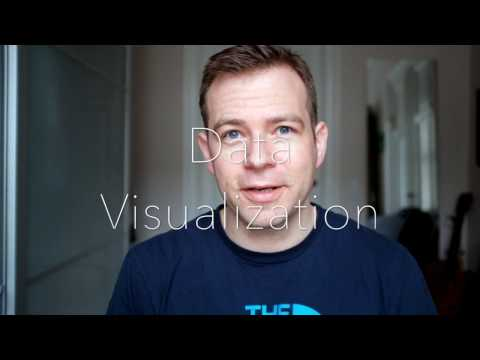

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('yHKYMGwefso', width=800, height=450)

> *Exercises*: Explanatory data visualization. 
> * What are the three key elements to keep in mind when you design an explanatory visualization?
> * In the video I talk about (1) *overview first*,  (2) *zoom and filter*,  (3) *details on demand*. 
>   - Go online and find a visualization that follows these principles (don't use one from the video). 
>   - Explain how your video achieves (1)-(3). It might be useful to use screenshots to illustrate your explanation.
> * Explain in your own words: How is explanatory data analysis different from exploratory data analysis?
>
> **Note**. Keep your answers to the questions above short and sweet.

<div class="alert alert-block alert-info">
Try to answer these using your human brain.
</div>

### Answer to questions

- Three key elements:
    - Question: What is the result you found in the explore phase that you'd like to present? Be consice
    - Explortaion: Allow the user to explore the visualisation. Remember the three key-elements here; overview first, zoom and filter, details on demand
    - Audience: Consider what your audience is, in order to communicate correctly. Presenting a very technical visualisation about fx. programming languages performance is not the same to a 12 year-old and a computer science professor.
- [Data visualisation that follows the three principles](https://vizhub.healthdata.org/subnational/usa).
    - 1: Overview first: As you enter the data viz, you get an overview of the health trends in the United States at the county level between 2000 and 2019 for life expectancy at birth. 
    - 2: Zoom and filter: You can filter the dataset to be on life expectancy or mortality rates. You can filter by locations, state/county, age, sex and racial and ethnic groups. The map allows you to zoom in on whatever area you're interested to explore further. Theres even a play button that plays the visualisation interactively from 2000 - 2019.
    - 3: Details on demand: As you hover over each state or county, an interactive box pops up where you get the details on demand for life expectancy for that state compared to overall USA, and you see the uncertainty for lower / upper bounds.
- Below is a screenshot of the dataset filtered by life expectancy at 30 yeras old by state, females only, all racial and ethnical groups in 2012.
![Image](../res/US-healt-map-viz.png)
- Exploratory is very open and not defined. This is where you look at differnet patterns of how the dataset looks. It's meant for you and only you (or the group of people you're working with), so you don't need to be too specific about adding labels and so on. It's a playgroud. Explanatory is when you have to be very specific in how you are going to communciate your results to someone else. Of course you might understand the dataset because you've worked with it, but how do you ensure that others who have never seen it before will also understand it?

> Note to self: I found lots of fun visualisations for inspiration at [the website of INSTITUTE FOR HEALTH METRICS AND EVALUATION](https://www.healthdata.org/data-tools-practices/interactive-data-visuals)

## Part 2: Interactive visualizations with Bokeh



To really master interactive visualizations, you will need to work with JavaScript, especially [D3](https://d3js.org). Given the limited time available for this class, we can't squeeze that in. But luckily Python has some pretty good options for interactive visualizations. You can find a range of different options [here](https://mode.com/blog/python-interactive-plot-libraries/).

Today, we'll explore [`Bokeh`](https://docs.bokeh.org/en/latest/), which provides lots of nice interactive funtionalities to Python. To work with Bokeh, we first set up our system:

1. If you haven't installed it yet please do so. You can simply follow [these steps](https://docs.bokeh.org/en/latest/docs/first_steps/installation.html)

2. To include Bokeh in your notebooks you can follow the [Bokeh: Using with Jupyter](https://docs.bokeh.org/en/latest/docs/user_guide/output/jupyter.html#jupyter) guide. Come back to this one when you need it

3. We aim to give you a gentle start with Bokeh and I am going to include more example code than usual in the follwing.
   * **HINT 1**: If you're not an experienced Python user, I recommend going to the [official user's guide](https://docs.bokeh.org/en/latest/docs/user_guide.html#userguide) and working through it. Start by clicking "Introduction" in the linked page. That page has a glossary, a section on output methods, stuff on settings, and interfaces that you can scroll through. The next page *Basic Plotting* where the action is. Spend some time working through that.
   * **HINT 2**: And by "working through it", I mean copy, paste, and run the code in your own notebook. 

Ok. Let's get started. First a general announcement on the data.

> **Announcement**
> * During this entire lecture, as always, we are going to work with the SF Crime Data. 
> * We will use data for the **period 2014-2024** (Jan 1st 2014 to Dec 31 2024).
> * We'll consider only the 10 focus crimes.


Now, to get you in the mood here's a little gif to illustrate what the goal of this exercise is:

![Movie](https://raw.githubusercontent.com/suneman/socialdata2025/main/files/Week6_1.gif)

If the gif isn't displaying on your system, you can download it [here](https://github.com/suneman/socialdata2025/blob/main/files/Week6_1.gif) and display locally.


> ***Exercise***: Recreate a new version of the results from **Week 2** (with updated dates) as an interactive visualisation (shown in the gif). To complete the exercise, follow the steps below to create your own version of the dataviz.

<div class="alert alert-block alert-info">
To learn about Bokeh and how it works, try to do this without LLM help. Only use if you get totally stuck after having tried all the various hints, and read the documentation. (Plus, notice the text en gray about the caption at the very end.)
</div>

### Data prep

A key step is to set up the data right. So for this one, we'll be pretty strict about the steps. The workflow is

1. Take the data for the period of 2014-2024 and group it by hour-of-the-day.
2. We would like to be able to easily compare how the distribution of crimes differ from each other, not absolute numbers, so we will work on *normalized data*:
    * To normalise data for within a crime category you simply to devide the count for each hour by the total number of this crime type. (To give a concrete example in the `DRUG/NARCOTIC` category, take the number of drug/narcotics-counts in 1st hour you should devide by the total number of drug/narcotic arrests, then you devide number of drug/narcotics-counts in 2nd hour by the total number of drug/narcotics arrests and so on)
    *  Your life will be easiest if you organize your dataframe as shown in [this helpful screenshot](https://github.com/suneman/socialdata2025/blob/main/files/W6_Part2_data.png).

If you've followed these steps, your data should be ready! Take a moment to celebrate. Below, we follow the [Bokeh guide for categorical data](https://docs.bokeh.org/en/latest/docs/user_guide/basic/bars.html).


1. First, let's convert our **Pandas Dataframe** to **Bokeh ColumnDataSource**:
   
  > ```python
  > source = ColumnDataSource(your_processed_dataframe)
  > ## it is a standard way to convert your df to bokeh
  > ```

2. We also need to create an empty figure (we will add our stuff here later on). Mini sub-exercise: Find the a guide how to define a figure in Bokeh online. Here is a little help:
  
  > ```python
  > p = figure(...., x_range = FactorRange(factors=hours), ...) 
  > #p is a standard way to call figures in Bokeh
  > #make sure to add x_range. In my case hours is a list on the form ['1', '2', '3' ... , '24']
  > #read up on the FactorRange in the guide
  > #do not forget to add other attributes to the figure, e.g. title, axis names and so on
  > ```

3. Now we are going to add the bars. In order to do so, we will use **vbar** (see the guide for help):
  
  > ```python
  > bar ={} # to store vbars
  > ### here we will do a for loop:
  > for indx,i in enumerate(focuscrimes):
  >     bar[i] = p.vbar(x='name_of_the_column_that_contain_hours',  top=i, source= src, 
  >                     ### we will create a vbar for each focuscrime
  >                     legend_label=i,  muted_alpha=..., muted = ....) 
  > #i stands for a column that we use, top=y; we are specifying that our numbers comes from column i
  > #read up what legend_label, muted and muted_alpha do... you can add more attributes (you HAVE TO)
  > ```

4. The last thing to do is to make your legend interactive and display the figure:
  
  > ```python
  > p.legend.click_policy="mute" ### assigns the click policy (you can try to use ''hide'
  > show(p) #displays your plot
  > ```

5. You will notice that the legend appears in the middle of the figure (and it occludes some of the data). In order to fix this look into [this guide](https://stackoverflow.com/questions/26254619/position-of-the-legend-in-a-bokeh-plot) as a start. <p style="color: gray;">It is OK to use an LLM for help on this part - the Bokeh documentation has changed over time, so this part is a little tricky.</p>
  
Now you should be able to recreate this amazing visualisation.


**EXTRA feature**: If you're interested in detailed instructions for more Bokeh visualizations for your final project, you can find more inspiration **[here](https://github.com/suneman/socialdata2021/blob/main/lectures/Week8_extra_bokeh.ipynb)**.

In [1]:
# packages
import utils
import numpy as np
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, FactorRange

In [2]:
df = utils.get_df_focused_crimes()
df = df[(df['Year'] >= 2014) & (df['Year'] <= 2024)]
df_grouped = df.groupby(['TimeOfDay', 'Category']).size().unstack()

In [3]:
# Normalize each column (divide by column sum)
# from chatGPT - really helpful!
df_normalized = df_grouped.div(df_grouped.sum(), axis=1)

# add hour column for easier access when doing viz
df_normalized["hour"] = df_normalized.index
df_normalized.head()

Category,ASSAULT,BURGLARY,DRUG/NARCOTIC,LARCENY/THEFT,PROSTITUTION,ROBBERY,STOLEN PROPERTY,VANDALISM,VEHICLE THEFT,WEAPON LAWS,hour
TimeOfDay,,,,,,,,,,,
0,0.049097,0.054366,0.030829,0.042884,0.097418,0.046935,0.046783,0.054114,0.039073,0.053607,0
1,0.043486,0.036836,0.018268,0.023779,0.057143,0.047936,0.027844,0.034404,0.022363,0.042063,1
2,0.037896,0.047324,0.016244,0.015793,0.047160,0.045492,0.027468,0.032196,0.018612,0.036489,2
3,0.020564,0.056964,0.012780,0.012182,0.033391,0.028090,0.022702,0.028341,0.015030,0.027197,3
4,0.014915,0.056600,0.007902,0.009010,0.015835,0.019787,0.021824,0.022911,0.012230,0.018638,4


In [22]:
import pandas as pd
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Legend
from bokeh.io import output_notebook
from bokeh.transform import dodge
from bokeh.palettes import Spectral10

# Convert to ColumnDataSource
source = ColumnDataSource(df_normalized)

In [ ]:
from bokeh.palettes import Spectral5
from bokeh.plotting import figure, show
from bokeh.sampledata.autompg import autompg as df
from bokeh.transform import factor_cmap

df.cyl = df.cyl.astype(str)
group = df.groupby('cyl')

cyl_cmap = factor_cmap('cyl', palette=Spectral5, factors=sorted(df.cyl.unique()))

p = figure(height=350, x_range=group, title="MPG by # Cylinders",
           toolbar_location=None, tools="")

p.vbar(x='cyl', top='mpg_mean', width=1, source=group,
       line_color=cyl_cmap, fill_color=cyl_cmap)

p.y_range.start = 0
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "some stuff"
p.xaxis.major_label_orientation = 1.2
p.outline_line_color = None

show(p)

In [72]:
source = ColumnDataSource(df_normalized)
hrs = df_normalized["hour"].tolist()
crimes = list(df_normalized.columns[:-1])  # exclude hours to get all focus crimes

p = figure(height=350, x_range=FactorRange(*hrs), # adding a * to the factorrange reads it as strings
           title="Hour-by-hour probabilities - SF focus crimes", toolbar_location=None, tools="")

# adding legend before adds it "outside" the figure, and then appending to legend_labels will set set these values inside the group
p.add_layout(Legend(), 'right')
p.legend.click_policy='mute'
p.legend.title = "Crime Type"

# Add vbars for each crime category
for crime, color in zip(crimes, Spectral10):
    p.vbar(x='hour', top=crime, width=0.8, source=source, 
           color=color, 
           legend_label=crime, # adds the crime type to the legend
           alpha=0.6, # default alpha value for the bars
           muted=True, # hides the bars by a value
           muted_alpha=0 # sets the hidden alpha value
           )

p.y_range.start = 0
p.xgrid.grid_line_color = None
p.xaxis.axis_label = "Time of day"
p.xaxis.major_label_orientation = 1.2 # for rotating
p.outline_line_color = None

p.yaxis.axis_label = "(Normalized) crime count"

output_notebook() # only show it in the notebook
show(p)

Loading BokehJS ...

## Part 3: Narrative Dataviz

Let's finish up with some reading

*Reading*: [Narrative Visualization: Telling Stories with Data](http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf) by Edward Segel and Jeffrey Heer. We'll read section 1-3 today. (And the rest a bit later).

When you get to section 3 it's fun to open up the examples mentioned by the authors in a browser and explore them as you read the text. 

> *Exercise*: Answer a couple of questions about the paper.
> 
> * What is the *Oxford English Dictionary's* defintion of a narrative?
> * What is your favorite visualization among the examples in section 3? Explain why in a few words.

<div class="alert alert-block alert-info">
For this one, read the text with your human brain and try to answer on your own too.
</div>

> The Oxford English Dictionary defines narrative as “an account of a
series of events, facts, etc., given in order and with the establishing of
connections between them.”